# This is the first Attempt




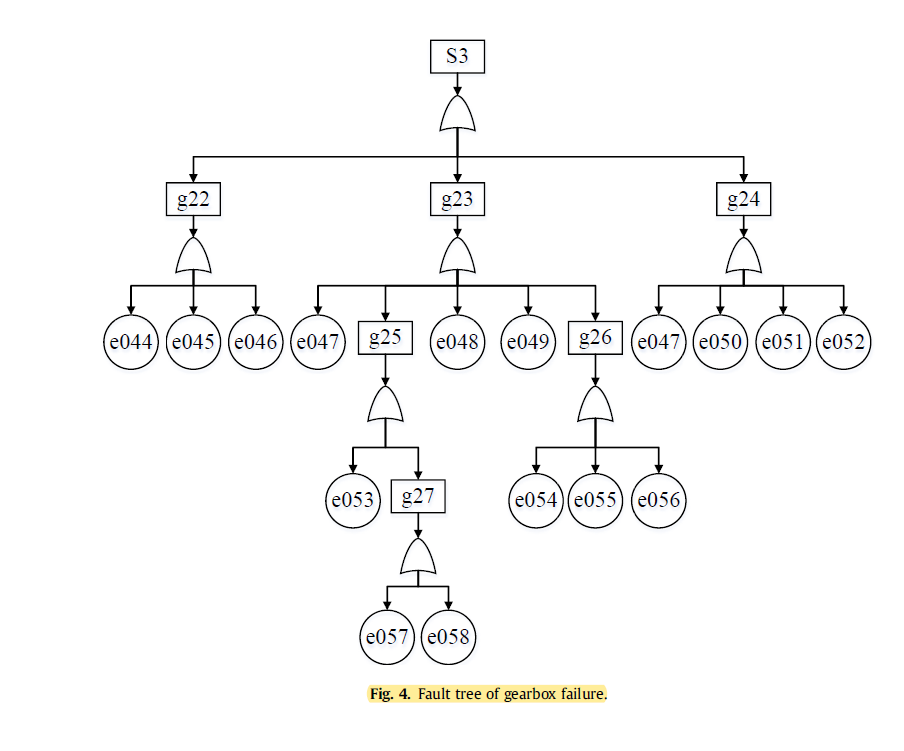


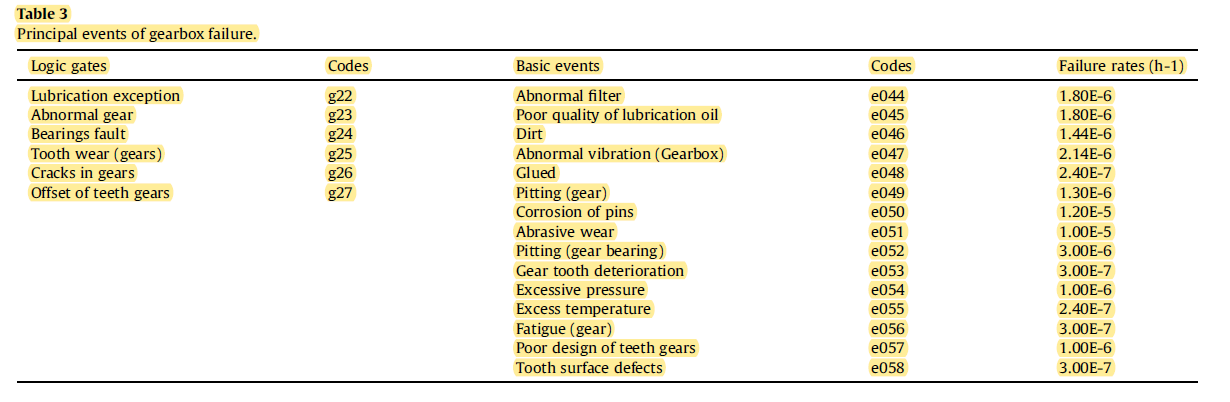

In [1]:
import numpy as np
from graphviz import Digraph

In [2]:
#Qualitative and Quantitativev options

In [3]:
# #using onshore
# #gives weights

# def Qualitative_Weights():
# #     length=len(lbls_name)
#     length=60
#     matrix=np.zeros((length,length))
#     matrix[0][1:6]=[0.0015,0.0910,0.016,0.004,0.0175]
#     matrix[1][6:9]=[0.7,0.2,0.1]
#     matrix[2][9:14]=[0.6,0.1,0.1,0.1,0.1]
#     matrix[3][14]=1
#     matrix[4][15:17]=[0.4,0.6]
#     matrix[5][17:21]=[0.4,0.3,0.2,0.1]

#     # starts connecting failure modes
#     matrix[6][21:29]=[0.1,0.2,0.25,0.15,0.12,0.08,0.05,0.05]
#     matrix[7][25:30]=[0,0,0,0.7,0.3]
#     matrix[8][30]=1

#     matrix[9][31:39]=[0.08,0.2,0.08,0.07,0.15,0.1,0.2,0.12]
#     matrix[10][[36,38,39]]=[0.2,0.3,0.5] #there is something wrong
#     matrix[11][37]=1
#     matrix[12][39:41]=[0,1]
#     matrix[13][41]=1

#     matrix[14][42:48]=[0.2,0.15,0.15,0.2,0.15,0.15]

#     matrix[15][48:51]=[0.3,0.35,0.35]
#     matrix[16][51:53]=[0.5,0.5]

#     matrix[17][53:58]=[0.1,0.2,0.15,0.2,0.35]
#     matrix[18][[55,58]]=[0.3,0.7]
#     matrix[19][56:58]=[0.6,0.4]
#     matrix[20][[57,59]]=[0.7,0.3]
    
#     basic_index = range(21,60)
#     for x in basic_index:
#         matrix[x][x]=1
    
#     return matrix

# Qualitative_Weights()[0]

In [4]:
def creatingArray_Qualitative():
    lbls_name = np.array(["Gearbox_Failure","Gear", "Bearing", "Lubrication System" , "Housing" , "Shaft",
                              "Gear teeth fail","Gear teeth Slip","Abnormal Gear noise",
                              "Loss of bearing Function","Abnormal bearing Noise","Bearing Ring Creep","bearing Misalignment","Overheating/Seizure",
                              "Loss of Lubrication",
                              "Fracture in Housing","Leakage",
                              "Fatigue and Fracture","Bending/Deflection","Surface Finish Degradation", "Shaft Missalignment",
                              "Gear Abrasive Wear","Gear Fretting Corrosion","Gear Scuffing"," Gear Pitting", "Plastic Deformation", "Tooth Shear","Gear Spalling","Tooth Bending Fatigue","Gear Missalignment","Gear Lack of Lubrication",
                              "Bearing Spalling","Bearing Smearing","Brinelling","Flutting","Axial Cracking","Bearing Scuffing","Contact Wear","Bearing Fretting Corrosion","Bearing Vibration","Fracture in bearing groove","Lack of heat removal in bearing",
                              "Failure of oil filter","Poor/altered oil quality","Debris","Lack of heat removal","Inadequate Oil","Pump loss",
                              "Housing Corrosion","Loose Fitting","Housing Vibration","Bolt Failure","Degraded Washers",
                              "Irregular Grooving","Weld defect","Shaft Fretting Corrosion","High Speed","High loads","High temperature","Improper Assembly"
                         ])
    
    basic_index = range(21,60)


    matrix=np.zeros((len(lbls_name)-len(basic_index),len(lbls_name)))
    
    matrix[0][1:6]=[0.0015,0.0910,0.016,0.004,0.0175]
    matrix[1][6:9]=[0.7,0.2,0.1]
    matrix[2][9:14]=[0.6,0.1,0.1,0.1,0.1]
    matrix[3][14]=1
    matrix[4][15:17]=[0.4,0.6]
    matrix[5][17:21]=[0.4,0.3,0.2,0.1]

    # starts connecting failure modes
    matrix[6][21:29]=[0.1,0.2,0.25,0.15,0.12,0.08,0.05,0.05]
    matrix[7][25:30]=[0,0,0,0.7,0.3]
    matrix[8][30]=1

    matrix[9][31:39]=[0.08,0.2,0.08,0.07,0.15,0.1,0.2,0.12]
    matrix[10][[36,38,39]]=[0.2,0.3,0.5] #there is something wrong
    matrix[11][37]=1
    matrix[12][39:41]=[0,1]
    matrix[13][41]=1

    matrix[14][42:48]=[0.2,0.15,0.15,0.2,0.15,0.15]

    matrix[15][48:51]=[0.3,0.35,0.35]
    matrix[16][51:53]=[0.5,0.5]

    matrix[17][53:58]=[0.1,0.2,0.15,0.2,0.35]
    matrix[18][[55,58]]=[0.3,0.7]
    matrix[19][56:58]=[0.6,0.4]
    matrix[20][[57,59]]=[0.7,0.3]
    
#     for x in basic_index:
#         matrix[x][x]=1
    
    return lbls_name, matrix, basic_index
 
#     matrix[0][1:6]=1
#     matrix[1][6:9]=1
#     matrix[2][9:14]=1
#     matrix[3][14]=1
#     matrix[4][15:17]=1
#     matrix[5][17:21]=1

#     # starts connecting failure modes
#     matrix[6][21:29]=1
#     matrix[7][25:30]=1
#     matrix[8][30]=1

#     matrix[9][31:39]=1
#     matrix[10][[36,38,39]]=[0.2,0.3,0.5]
#     matrix[11][37]=1
#     matrix[12][39:41]=1
#     matrix[13][41]=1

#     matrix[14][42:48]=1

#     matrix[15][48:51]=1
#     matrix[16][51:53]=1

#     matrix[17][53:58]=1
#     matrix[18][[55,58]]=1
#     matrix[19][56:58]=1
#     matrix[20][[57,59]]=1
    
#     basic_index = range(21,60)
#     for x in basic_index:
#         matrix[x][x]=1




In [5]:
# defining the FTA
# Variables lbls and lbls_name are the code names(optional) and names of the Fault tree elements elements
# order of lbls is important start from top level, end at basic events
# Matrix variable is a matrix of 0 and 1 of dimensions (n x n), n = no. of lbls
# n rows and n coloumns are in the order mentioned in lbls 
# 1 in Matrix depicts directly dependent lower elements
# basic_index is the array of indices indicating the basic faults out of lbls

def creatingArray_Quantitative():
#     lbls = np.array(["F","M1","M2","M3","B4","B5","B6","B7","I8","B9","B10","I11","B12","B13","B14","B15","I16","B17","B18","B19","B20","B21"])
    lbls_name = np.array(["Gearbox_Failure","Lubrication_Exception","Abnormal_Gear","Bearins_Fault","Abnormal_Filter",
                         "Poor_Quality_of_lubrication_oil","Dirt","Abnormal_Vibration","Tooth_Wear","Glued","Gear_Pitting",
                         "Cracks_in_Gear","Corrosion_of_Pins","Abrasive_Wear","Bearing_Pitting","gear_tooth_Deteriotian",
                         "Offset_of_teeth_gears","Excessive_Pressure","Exces_temperature","Gear_Fatigue","Poor_design_gear_teeth",
                         "Tooth_surface_defects"])
    # lbls_name = np.array(["Gearbox Failure","Lubrication Exception","Abnormal Gear","Bearins Fault","Abnormal Filter",
    #                      "Poor Quality of lubrication oil","Dirt","Abnormal Vibration","Tooth Wear","Glued","Gear Pitting",
    #                      "Cracks in Gear","Corrosion of Pins","Abrasive Wear","Bearing Pitting","gear tooth Deteriotian",
    #                      "Offset of teeth gears","Excessive Pressure","Exces temperature","Gear Fatigue","Poor design gear teeth",
    #                      "Tooth surface defects"])

    
    temp=len(lbls_name)
    #creating matrix one array at a time
    f0=np.zeros(temp) #f0 has dependencies with 1st,2nd and 3rd element(counting starts with 0)
    f0[1]=f0[2]=f0[3]=1
    
    m1=np.zeros(temp)
    m1[4]=m1[5]=m1[6]=1
    
    m2=np.zeros(temp)
    m2[7]=m2[8]=m2[9]=m2[10]=m2[11]=1

    m3=np.zeros(temp)
    m3[7]=m3[12]=m3[13]=m3[14]=1

    i8=np.zeros(temp)
    i8[15]=i8[16]=1

    i11=np.zeros(temp)
    i11[17]=i11[18]=i11[19]=1

    i16=np.zeros(temp)
    i16[20]=i16[21]=1
#     
    # concatenate the arrays in a matrix form
    matrix=np.zeros((temp,temp))
    matrix[0,:]=f0
    matrix[1,:]=m1
    matrix[2,:]=m2
    matrix[3,:]=m3
    matrix[8,:]=i8
    matrix[11,:]=i11
    matrix[16,:]=i16
    
    basic_index=np.array([4,5,6,7,9,10,12,13,14,15,17,18,19,20,21])
    for x in basic_index:
        matrix[x,x]=1

    # basic indices are represented as only one '1' in the matrix referring to the same column and row location
    
    return lbls_name, matrix, basic_index

In [6]:
# This part of code generates the prob array with only the given basic event probability mentioned, other values are set to 0
def Prob_Quantitative(matrix):
    basic_prob=np.array([1.8,1.8,1.44,2.14,0.24,1.3,12,10,3,0.3,1,0.24,0.3,1,0.3])
    i=10**-6
    basic_prob=basic_prob*i
    # basic probability is the probability of basic failure events occuring as given in literature

    temp=np.count_nonzero(matrix,axis=1)
    prob=np.zeros(len(matrix))
    i=0
    for x in range(len(matrix)):
        if temp[x]==1:
            prob[x]=basic_prob[i]
            i=i+1
    # variabile 'prob' is going to be used throughout the rest of the code
    # prob carries the probability of all Fault tree elements
    return prob

In [7]:
def Prob_Qualitative(matrix):
    
    prob=np.zeros(len(matrix))
    prob[0]=np.sum(matrix[0])
    prob[1:6]=matrix[0][1:6]
    
    for x in range(len(prob)):
        for y in range(6,len(prob)):
            if matrix[x][y] !=0:
                prob[y]=matrix[0][x]*matrix[x][y]
  
    return prob


In [8]:
# GearboxFTA function creates a tree diagram, uses lbls and matrix 
def GearboxFTA(lbls_name,matrix):
    dot=Digraph()
    for x in range(len(lbls_name)):
        for y in range(len(lbls_name)):
            if matrix[x,y] != 0:
                if x != y:
                    dot.edge(str(lbls_name[x]),str(lbls_name[y]))    
    display(dot)
    
    # saves the graph as pdf
#     dot.render('test-output/graph1.gv', view=True)  
#     'test-output/graph1.gv.pdf'



In [9]:
# function to calculate the failure rate of higher level tree elements from the basic event probability
def calc_failure_Quantitative(prob,matrix):
    rev_mat=np.copy(matrix[::-1])
    # reversing the order so that lower level events are evaluated first and their result can be used for higher level
    prob_tem=np.copy(prob) # copy of probability
    tem=np.zeros(len(rev_mat))
    for x in range(len(rev_mat)):
        tem=prob_tem*rev_mat[x]  # setting all probabilities other than dependent proababilites as 0
        # reversing order of probability
        prob_tem[len(rev_mat)-x-1]=1-np.prod(1-tem) #probability calculating formula
    prob_final=np.copy(prob_tem)
    return prob_final


In [10]:
# chane=[1,2,3,4,5,6]
# a=chane[-5:]
# a

In [11]:
def calc_failure_Qualitative(change_input,matrix):
#     change=np.ones(len(basic))
#     change= [1.]*len(basic)
    basic=len(matrix[0])-len(matrix)
    change = change_input[-basic:]

    W=matrix[6:21,21:60] # matrix with weights of failure cause, dimension=n(failuremodes)xn(failurecauses)
    A=matrix[1:6,6:21] # matrix with failure mode weights, dimension= n(components)xn(failuremodes)
    F=matrix[0,1:6] # array of failure rates of subassembly(also called as component)
#     F = [0.0015,0.0910,0.016,0.004,0.0175]
   
    M=np.matmul(W,np.transpose(change)) #Updated weights of failure causes based on user requested change and sumed them up , dimension=n(failuremodes),1
    
#     P=np.matmul(A,M) #
    P=A*M
    temp=np.transpose(F*np.transpose(P))
    Fail=[]
    for x in temp:
        Fail.append(sum(x))
        
    Fail.insert(0,sum(Fail))

    for x in temp:
        for y in x:
            if y != 0:
                Fail.append(y)
    return Fail


In [12]:
# #Select between Quantitative(Kang and Li's work) or Qualitative(Bhardwaj's work)

# # lbls_name,matrix, basic_index = creatingArrays_Quantitative()
# lbls_name, matrix, basic_index = creatingArray_Qualitative()

# # GearboxFTA(lbls_name,matrix)

# # prob=Prob_Quantitative()
# prob=Prob_Qualitative()


In [13]:
# print(prob)

In [14]:
# making a component->RIF->cause nested class

class cause:
    def __init__(self,RIFname,cause_arr,lbls_name):
        self.name=RIFname #name of RIF
        self.cause=lbls_name[cause_arr] #name of causes corresponding to each RIF
        self.causeindex=cause_arr #index of causes corresponding to each RIF
        self.causechange=np.ones(len(cause_arr)) # can be used to store reqeuested change in failure cause prob
class RIF:
    def __init__(self,component,RIF,lbls_name,cause_mat):
        self.name=component #name of the component
        self.allRIFs=RIF #name of all rifs in a component
        self.RIF=[None]*len(RIF)
        for x in range(len(self.RIF)):
            self.RIF[x]=cause(RIF[x],cause_mat[x],lbls_name) #nests class cause

In [15]:
def nestingRIFs_Qualitative(lbls_name):
    # components is a list array defining all componets
    components=np.array(["Bearing","Bearing_Lube","Gears","Gear_Lube","Lubrication System","Housing","Shaft","Others"])

    # RIF_x is the names of all RelibilityInfluencingFactors of component x
    # x_causemat are 2D arrays each row contains the indices of basic causes in the FTA
    # Rows corresponds with the different rifs in the  component in the order of RIF_x
    RIF_gear = np.array(["Gear Quality","Gear Maintenance Accessibility"])
    gear_causeMat=[[25,26,27,28,29],[29,30]]

    RIF_gearlube = np.array(["Improper Gear Lubrication", "Gear Lube Contamination"])
    gearlube_causeMat=[[23,24,27,30],[21,22,23,24 , 43,44]]
    
    RIF_bearing = np.array(["Bearing Quality","Bearing Maintenance Accessibility"])
    bearing_causeMat=[[35,39,40],[34,40]]

    RIF_bearinglube = np.array(["Improper Bearing Lubrication", "Bearing Lube Contamination"])
    bearinglube_causeMat=[[33,36,37,41],[31,37]]

    RIF_lubesys = np.array(["Lubrication System Quality","Lubrication System Maintainenece Frequency","Lubrication System Maintenance Accessibility"])
    lubesys_causeMat=[[44,46],[42,43],[47]]
    
    RIF_housing = np.array(["Housing Quality","Housing Maintenance Accessibility","Housing Maintainenece Frequency"])
    housing_causeMat=[[49],[49],[51]]
    
    RIF_shaft = np.array(["Shaft Quality","Shaft Maintenance Accessibility"])
    shaft_causeMat=[[59],[53,54]]
    
    RIF_others = np.array(["Wind","External_Vibration", "Temperature" , "Environment"])
    others_causeMat=[[21,28,31,33,36,37,41,56,57],[22,28,29,32,38,39,45,46,50,59],[25,30,35,41,52,58],[22,24,38,43,48,55]]
    
    # allRIFs is array of RIF arrays
    # cause mat is  3d array of individual 2d arrays
    allRIFs=[RIF_gear,RIF_gearlube,RIF_bearing,RIF_bearinglube,RIF_lubesys,RIF_housing,RIF_shaft,RIF_others]
    causemat=[gear_causeMat,gearlube_causeMat,bearing_causeMat,bearinglube_causeMat,lubesys_causeMat,housing_causeMat,shaft_causeMat,others_causeMat]
    
    component= [None]*len(components)
    print(len(components))
    #assign values to the component_rif classes    
    for x in range((len(components))):
            component[x]=RIF(components[x],allRIFs[x], lbls_name,causemat[x])
    return component


In [16]:
# nesting RIFs provides values inside the nested classes
def nestingRIFs_Quantitative(lbls_name):
    # components is a list array defining all componets
    components=np.array(["Bearing","Bearing_Lube","Gears","Gear_Lube","Others"])

    # RIF_x is the names of all RelibilityInfluencingFactors of component x
    # x_causemat are 2D arrays each row contains the indices of basic causes in the FTA
    # Rows corresponds with the different rifs in the  component in the order of RIF_x
    RIF_bearing = np.array(["Bearing_Design","Material_Hardness", "Material_Quality" , "Surface_Hardness"])
    bearing_causeMat=[[14],[12],[14],[14]]

    RIF_bearinglube = np.array(["Grease_Quality", "Contamination"])
    bearinglube_causeMat=[[12,13],[13]]

    RIF_gear = np.array(["Gear_Design","Surface_Roughness","Surface_Hardness", "Material_Quality"])
    gear_causeMat=[[19,20,21],[15],[15],[15,19,21]]

    RIF_gearlube = np.array(["Lubricant_Quality"])
    gearlube_causeMat=[[9,15,18]]

    RIF_others = np.array(["External_Vibration", "Temperature" , "Environment", "Filter_Design"])
    others_causeMat=[[7,9],[5,18],[4,5,12],[4]]
    
    # allRIFs is array of RIF arrays
    # cause mat is  3d array of individual 2d arrays
    allRIFs=[RIF_bearing,RIF_bearinglube,RIF_gear,RIF_gearlube,RIF_others]
    causemat=[bearing_causeMat,bearinglube_causeMat,gear_causeMat,gearlube_causeMat,others_causeMat]
    
    component= [None]*len(components)
    
    #assign values to the component_rif classes    
    for x in range((len(components))):
            component[x]=RIF(components[x],allRIFs[x], lbls_name,causemat[x])
    
    return component

In [17]:
# component=nestingRIFs_Quantitative()
# component=nestingRIFs_Qualitative()

In [18]:
#similar to gearbox fta function uses dot diagrm to create a visual network of component-RIF and corresponding causes
# uses the nested class data
# from graphviz import Digraph
# dot2=Digraph()
# for x in range(len(component)):
#     for y in range(len(component[x].allRIFs)):
#         dot2.edge(component[x].name,component[x].allRIFs[y])
#         for z in range(len(component[x].RIF[y].cause)):
#             dot2.edge(component[x].allRIFs[y],component[x].RIF[y].cause[z])
# display(dot2)

## GUI interface based on PySimpleGUI
### Function: get_user_input

In [19]:
# Function output_stuff creates the gui that outputs the resultant failure rate improvenet based on user changes requested in
# the functiton getuserinput. An option to save the results is also provided

# outputstaff takes input of user_indices(indices of component,rif,cause chosen by the user) and user_change(change in percentage for all the causes)

def output_windowQuantitative(user_indices , user_change, component,prob,matrix):
    # pysimplegui is used as the addon for GUI
    import PySimpleGUI as sg
    
    sg.change_look_and_feel('GreenTan') # give our window a spiffy set of colors

    
    failureRate=calc_failure_Quantitative(prob,matrix)

    prob_updated=np.copy(prob)
    
    #temparory variable 'a' would be string type and be output on the window
    a=''
    
    # loop runs for the number of cause changes called
    for x in range(len(user_change)):
        user=user_indices[x]
        a= a + str(component[user[0]].RIF[user[1]].cause[user[2]] + " is modified by : " + user_change[x] + "%") +'\n'
        # prob_updated changes the requested cause probability by the reuested amount
        prob_updated[component[user[0]].RIF[user[1]].causeindex[user[2]]] = prob_updated[component[user[0]].RIF[user[1]].causeindex[user[2]]] * (1+int(user_change[x])/100)
    
    

    failureRate_updated=calc_failure_Quantitative(prob_updated,matrix)
    a= a + "Original Gearbox Failure Rate: " + str(failureRate[0])+ '\n'
    a= a + "Modified Gearbox Failure Rate: " + str(failureRate_updated[0]) + '\n'
    improvement=(failureRate[0]-failureRate_updated[0])/failureRate[0]*100 
    a= a+ "Net improvement: " + str(improvement) + "%" + '\n'
    
    # multiline is used for output
    # layout decribes the elements of the GUI
    MLINE_KEY = '-MLINE-'+sg.WRITE_ONLY_KEY
    layout = [  [sg.Multiline(a,size=(60,20), key=MLINE_KEY)],
                [sg.Button('Save Results and Exit'), sg.Button('Disregard Results and Exit')] ]

    #comnd generate and names the window
    window = sg.Window('Calculation of Results', layout, font=('Helvetica', ' 13'), default_button_element_size=(8, 2))

    while True:     # The Event Loop
        event, value = window.read()
        if event is None:
            break
        if event == 'Disregard Results and Exit':            
            window.close()
        if event == 'Save Results and Exit':
            window.close()
            return a
        #if save result selected, the widow closes nd the content of output window 'a' is returned


In [20]:
# Function output_stuff creates the gui that outputs the resultant failure rate improvenet based on user changes requested in
# the functiton getuserinput. An option to save the results is also provided

# outputstaff takes input of user_indices(indices of component,rif,cause chosen by the user) and user_change(change in percentage for all the causes)

def output_windowQualitative(user_indices , user_change,component,prob,matrix):
    # pysimplegui is used as the addon for GUI
    import PySimpleGUI as sg
    
    sg.change_look_and_feel('GreenTan') # give our window a spiffy set of colors

    prob_updated=np.copy(prob)
    
    change=[1]*len(matrix[0])
    
    #temparory variable 'a' would be string type and be output on the window
    a=''
    
    # loop runs for the number of cause changes called
    for x in range(len(user_change)):
        user=user_indices[x]
        a= a + str(component[user[0]].RIF[user[1]].cause[user[2]] + " is modified by : " + user_change[x] + "%") +'\n'
        # prob_updated changes the requested cause probability by the reuested amount
        change[component[user[0]].RIF[user[1]].causeindex[user[2]]] = 1+int(user_change[x])/100
    
    failureRate=Prob_Qualitative(matrix)
    failureRate_updated=calc_failure_Qualitative(change,matrix)
    a= a + "Original Gearbox Failure Rate: " + str(failureRate[0])+ '\n'
    a= a + "Modified Gearbox Failure Rate: " + str(failureRate_updated[0]) + '\n'
    improvement=(failureRate[0]-failureRate_updated[0])/failureRate[0]*100 
    a= a+ "Net improvement: " + str(improvement) + "%" + '\n'
    
    # multiline is used for output
    # layout decribes the elements of the GUI
    MLINE_KEY = '-MLINE-'+sg.WRITE_ONLY_KEY
    layout = [  [sg.Multiline(a,size=(60,20), key=MLINE_KEY)],
                [sg.Button('Save Results and Exit'), sg.Button('Disregard Results and Exit')] ]

    #comnd generate and names the window
    window = sg.Window('Calculation of Results', layout, font=('Helvetica', ' 13'), default_button_element_size=(8, 2))

    while True:     # The Event Loop
        event, value = window.read()
        if event is None:
            break
        if event == 'Disregard Results and Exit':            
            window.close()
        if event == 'Save Results and Exit':
            window.close()
            return a
        #if save result selected, the widow closes nd the content of output window 'a' is returned

In [21]:
#GUI to take user input for change basic cause probability
# allows multiple causes to be changed at once
def GetUserInput(component,prob,matrix,analysis_type):
    import PySimpleGUI as sg

    sg.change_look_and_feel('Light Green 1')

# Table generation code using pysimplegui has been taken from https://pysimplegui.trinket.io/demo-programs#/tables/the-table-element
    
    # ------ Some functions to help generate data for the table ------
    def word():
        return ''.join(random.choice(string.ascii_lowercase) for i in range(10))
    def number(max_val=1000):
        return random.randint(0, max_val)


    # ------ Make the Table Data ------
    # data = data_forGUI has 3 columns: component, RIF and cause
    # data_index just carries the indices for each row
    data_forGUI=[]
    data_index=[]
    for x in range(len(component)):
        for y in range(len(component[x].allRIFs)):
            for z in range(len(component[x].RIF[y].cause)):
                data_forGUI.append([component[x].name , component[x].allRIFs[y], component[x].RIF[y].cause[z]])
                data_index.append([x,y,z])
    
    data = data_forGUI
    headings = ['Component','RIF','Cause']

    # ------ Window Layout ------
    # window divided into 2 columns, column1 just has the table, coulmn 2 has the user selections
    cl1_layout = [[sg.Table(values=data, headings=headings, max_col_width=25, background_color='lightblue',
                        auto_size_columns=True,
                        display_row_numbers=True,
                        justification='right',
                        num_rows=20,
                        alternating_row_color='lightyellow',
                        key='-TABLE-',
                        tooltip='RIFs and Causes')]]
    
    #Table data has an extra column of row no. which would be used to select the causes by the user
    
    #rows and change array hold the user selected values of rows and change respetably
    rows_array=[]
    change_array=[]
    headings_table2=['Chosen Row','Chosen Change','a']

    cl2_layout=[[sg.Text('Use Row numbers in adjacent table to select specifc cause and type the corresponding change requested', size=(40,3))],
                [sg.Text('Row No.', size=(15,1)),sg.Text('% Change', size=(20,1))],
                [sg.Input([], size=(15,1), key='rows'),sg.Input([], size=(20,1), key='change')],[sg.Button('Add Another'), sg.Button('Reset')],
                [sg.HorizontalSeparator()],
                [sg.Text('Selected Values: ')],[sg.Text('Selected Rows: ', size=(15,1)),sg.Text('Selected Change', size=(20,1))],
                [sg.Listbox(values=rows_array,size=(10,4), key='-rowDisplay-'), sg.Listbox(values=change_array,size=(20,4), key='-changeDisplay-')],
                [sg.Button('Calculate'), sg.Button('Exit')]
               ]
    # Listboxes shows the user selection
    # 'reset' clears user selection
    # 'Add Another' adds another cause and change value to the selection
    # 'calculate' opens output_stuff function to display the results
    col1= sg.Column(cl1_layout)
    col2= sg.Column(cl2_layout)
    layout= [[col1,col2]]
    
    results = ''
    # ------ Create Window ------
    window = sg.Window('RIFs and Causes', layout)

    # ------ Event Loop ------
    while True:
        event, values = window.read()
        if event is None:
            break
        if event == 'Add Another':
            rows_array.append(values['rows'])
            change_array.append(values['change'])
            window.Element('-rowDisplay-').Update(rows_array)
            window.Element('-changeDisplay-').Update(change_array)
        if event == 'Reset':
            rows_array=[]
            change_array=[]
            window.Element('-rowDisplay-').Update(rows_array)
            window.Element('-changeDisplay-').Update(change_array)     
        if event == 'Calculate':
            indices = []
            for x in range(len(rows_array)):
                indices.append(data_index[int(rows_array[x])])
            results= results + (eval("output_window"+ analysis_type + "(indices,change_array,component,prob,matrix)"))
        if event == 'Exit':
            window.close()

    # Results returns the 'saved content' of the output windw to be saved and used later
    return results



In [22]:
def Quantitative_analysis():
    lbls_name, matrix, basic_index = creatingArray_Quantitative()
    prob=Prob_Quantitative(matrix)
    component=nestingRIFs_Quantitative(lbls_name)
    Results = GetUserInput(component,prob,matrix,"Quantitative")
#     for x in Results:
#         print(str(x))
    return Results

def Qualitative_analysis():
    lbls_name, matrix, basic_index = creatingArray_Qualitative()
    prob=Prob_Qualitative(matrix)
    component=nestingRIFs_Qualitative(lbls_name)
    Results = GetUserInput(component,prob,matrix,"Qualitative")
#     for x in Results:
#         print(str(x))
    return Results


In [23]:
def ResultLog(a):
    import PySimpleGUI as sg
    
    sg.change_look_and_feel('GreenTan') # give our window a spiffy set of colors

    # multiline is used for output
    # layout decribes the elements of the GUI
    MLINE_KEY = '-MLINE-'+sg.WRITE_ONLY_KEY
    layout = [  [sg.Multiline(a,size=(60,20), key=MLINE_KEY)],
                [sg.Button('Exit')] ]

    #comnd generate and names the window
    window = sg.Window('Logged Results', layoutb, font=('Helvetica', ' 13'), default_button_element_size=(8, 2))

    while True:     # The Event Loop
        event, value = window.read()
        if event is None:
            break
        if event == 'Exit':            
            window.close()
        #if save result selected, the widow closes nd the content of output window 'a' is returned

In [24]:
def OutputPlots():
    def draw_figure(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
        figure_canvas_agg.draw()
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
        return figure_canvas_agg


    def delete_figure_agg(figure_agg):
        figure_agg.get_tk_widget().forget()
        plt.close('all')


    # -------------------------------- GUI Starts Here -------------------------------#
    # fig = your figure you want to display.  Assumption is that 'fig' holds the      #
    #       information to display.                                                   #
    # --------------------------------------------------------------------------------#

    # print(inspect.getsource(PyplotSimple))

    fig_dict = {'Pyplot Simple': PyplotSimple, 
                'Pyplot Box Plot': PyplotBoxPlot, 'Artist Customized Box Plots': PyplotArtistBoxPlots,
                'Artist Customized Box Plots 2': ArtistBoxplot2,'ActualGraph':PieChartContribution}


    sg.theme('LightGreen')
    figure_w, figure_h = 500,500        # for Non-TRINKET use 650,650
    # define the form layout
    listbox_values = list(fig_dict)
    col_listbox = [[sg.Listbox(values=listbox_values, change_submits=True, size=(28, len(listbox_values)), key='-LISTBOX-')],
                   [sg.Text(' ' * 12), sg.Exit(size=(5, 2))]]

    col_multiline = sg.Col([[sg.MLine(size=(70, 35), key='-MULTILINE-')]])
    col_canvas = sg.Col([[sg.Canvas(size=(figure_w, figure_h), key='-CANVAS-')]])
    col_instructions = sg.Col([[sg.Pane([col_canvas, col_multiline], size=(figure_w,figure_h))],
                               [sg.Text('Grab square above and slide upwards to view source code for graph')]])

    layout = [[sg.Text('Matplotlib Plot Test', font=('ANY 18'))],
              [sg.Col(col_listbox), col_instructions], ]

    # create the form and show it without the plot
    window = sg.Window('Demo Application - Embedding Matplotlib In PySimpleGUI',
                       layout, resizable=True, finalize=True)

    canvas_elem = window['-CANVAS-']
    multiline_elem = window['-MULTILINE-']
    figure_agg = None

    while True:
        event, values = window.read()
        if event in (None, 'Exit'):
            break

        if figure_agg:
            # ** IMPORTANT ** Clean up previous drawing before drawing again
            delete_figure_agg(figure_agg)
        # get first listbox item chosen (returned as a list)
        choice = values['-LISTBOX-'][0]
        # get function to call from the dictionary
        func = fig_dict[choice]
        # show source code to function in multiline
        window['-MULTILINE-'].update(inspect.getsource(func))
        fig = func()                                    # call function to get the figure
    #     figure_agg = draw_figure(
    #         window['-CANVAS-'].TKCanvas, fig)  # draw the figure


In [25]:
import PySimpleGUI as sg

# ----------- Create the 3 layouts this Window will display -----------
layout1 = [[sg.Text('This is the first screen, evaluation')],
           *[[sg.CB(f'Checkbox {i}')] for i in range(5)]]

layout2 = [[sg.Text('This is layout 2')],
           [sg.Input(key='-IN-')],
           [sg.Input(key='-IN2-')]]

options=['Quantitative Analysis','Qualitative Analysis', 'Known Stuff', 'Generated Output']
keys=['Quan','Qual','Stuff','Output']
layout3 = [[sg.Text('This is layout 3 - It is all Radio Buttons')],
           *[[sg.R(f'{options[x]}', 1,key=keys[x])] for x in range(len(options))]]

# ----------- Create actual layout using Columns and a row of Buttons
layout = [[sg.Column(layout3, key='-COL1-')],
          [sg.Button('Select'), sg.Button('Exit')]]

window = sg.Window('Swapping the contents of a window', layout)

Results=''

layout = 3  # The currently visible layout
while True:
    event, values = window.read()
#     print(event,values)
    if event in (None, 'Exit'):
        break
    if event == 'Select':
        if values[keys[0]] == True:
            Results = Results + 'Analysis Type: Quantitative\n' + Quantitative_analysis()+'\n'
        if values[keys[1]] == True:
            Results = Results + 'Analysis Type: Qualitative\n' + Qualitative_analysis() + '\n'
        if values[keys[3]] == True:
            if Results=='':
                ResultLog('No Logged Results')
            else:
                ResultLog(Results)
                
            
window.close()


*** tk version 8.6.9 detected.... patching ttk treeview code ***
8
*** tk version 8.6.9 detected.... patching ttk treeview code ***


NameError: name 'prob' is not defined

In [ ]:
# Results = GetUserInput() 



In [ ]:
# 'increment' function returns a array of failure rate improvement based on input array of changes 
# 'xaxis' is the percentage change
# 'indices' of basic_causes that are requested to be changed 
def increments(xAxis, indices):
    Combined_fail=[] #intended to have the updated gearbox failure rate
    initial_fail=(calc_failure(prob)[0]) #with no changes
    for x in indices:
        failrate_temp=[]
        for y in xAxis:
            prob_temp= np.copy(prob)
            prob_temp[x]=prob_temp[x] * (1+y/100)
            fail=calc_failure(prob_temp)
            failrate_temp.append(fail[0])
        Combined_fail.append(failrate_temp)
    
    improvement=(Combined_fail-initial_fail)/initial_fail*100 
        
    return improvement

xAxis=np.linspace(-20,20,20)
PlotPoints=increments(xAxis, basic_index)

print(PlotPoints[0])

In [ ]:
#plots the output from 'increment' fucntion which is taken as values
# xAxis is taken as x and the label is for the legend
# ########--- can also add title ---#########
def PyplotSimple(values,x, labels):
    import matplotlib.pyplot as plt
    i=0
    plt.figure(figsize=(10,10))

    for y in values:
        plt.plot(x,y, label=labels[i])
        i=i+1

    plt.xlabel('Percentage Basic Fault Rate Change')
    plt.ylabel('Percentage Gearbox Failure Rate Change')
    plt.title('Try1')
    plt.legend()    
    plt.show()

PyplotSimple(PlotPoints,xAxis, lbls_name[basic_index])

In [ ]:
indices=[]
for x in range(len(component)):
    temp_index=[]
    for y in range(len(component[x].allRIFs)):
        temp_index.extend(component[x].RIF[y].causeindex)
    indices.append(temp_index)
print(indices)
# print(lbls_name[indices[0]])

labels2=[]
for x in component:
    labels2.append(x.name)
    
print(labels2)

PlotPoints2=increments(xAxis, indices)

PyplotSimple(PlotPoints2,xAxis, labels2)

In [ ]:
# get ratios of contribution for F0, M1,M2 and M3
# to be used to generate pie charts of contributions 
def calculating_ratios():
    ratios_temp=[0]*4
    ratios=[0]*4
    failureRate=calc_failure(prob)
    for x in range(0,4):
        ratios_temp[x]= failureRate[list(np.nonzero(matrix[x])[0])]
        ratios[x]= 100*ratios_temp[x]/np.sum(ratios_temp[x])
    return ratios 

#ratio of failure mode failurer rates

In [ ]:
# specifically used to create pie chart of failure rate contribution

def PieChartContribution():
    import matplotlib.pyplot as plt
    labels = [None]*4

    fracs=calculating_ratios()
    # Make figure and axes
    fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)
    # sets size and number of sub charts
    radii=1 # radii of pies
    # A standard pie plot
    for x in range(0,4):
        labels[x] = lbls_name[list(np.nonzero(matrix[x])[0])] # takes label name index from non zero matrix elements

    # properties for all 4 pies, called by axs(x,y).pie , fracs is the ratio and title is called from lbls 
    axs[0,0].pie(fracs[0], autopct='%.0f%%', shadow=True, radius=radii)
    axs[0,0].set_title(lbls_name[0], weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    legend = axs[0,0].legend(labels[0], loc=(0.9, .95), labelspacing=0.1, fontsize='small')

    axs[1,1].pie(fracs[1], autopct='%.0f%%', shadow=True, radius=radii)
    axs[1,1].set_title(lbls_name[1], weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    legend = axs[1,1].legend(labels[1], loc=(0.9, .95), labelspacing=0.1, fontsize='small')


    axs[1,0].pie(fracs[2], autopct='%.0f%%', shadow=True, radius=radii)
    axs[1,0].set_title(lbls_name[2], weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    legend = axs[1,0].legend(labels[2], loc=(0.9, .95), labelspacing=0.1, fontsize='small')

    
    axs[0,1].pie(fracs[3], autopct='%.0f%%', shadow=True, radius=radii)
    axs[0,1].set_title(lbls_name[3], weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    legend = axs[0,1].legend(labels[3], loc=(0.9, .95), labelspacing=0.1, fontsize='small')



    plt.show()

# PieChartContribution()

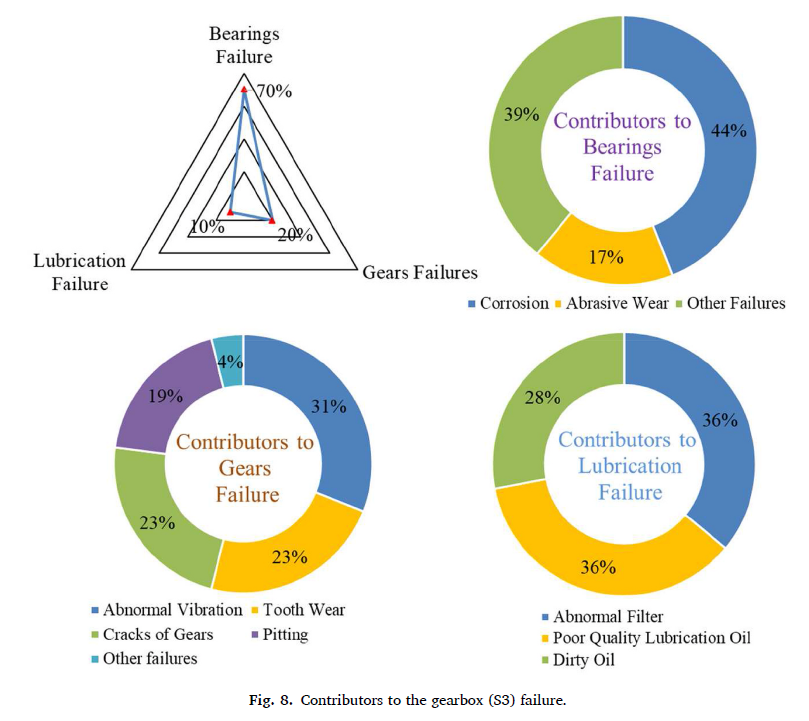

In [ ]:
# Stolen from: https://pysimplegui.trinket.io/demo-programs#/examples-for-reddit-posts/machinerys-handbook

# import PySimpleGUI as sg

# def get_user_input():
    
#     component_to_RIF_dict ={
#         component[0].name: component[0].allRIFs, 
#         component[1].name: component[1].allRIFs,
#         component[2].name: component[2].allRIFs,
#         component[3].name: component[3].allRIFs,
#         component[4].name: component[4].allRIFs
#     }
    
#     RIF_to_cause_dict ={
#         component[0].allRIFs[0] : ' , '.join(component[0].RIF[0].cause),
#         component[0].allRIFs[1] : ' , '.join(component[0].RIF[1].cause),
#         component[0].allRIFs[2] : ' , '.join(component[0].RIF[2].cause),
#         component[0].allRIFs[3] : ' , '.join(component[0].RIF[3].cause),
#         component[1].allRIFs[0] : ' , '.join(component[1].RIF[0].cause),
#         component[1].allRIFs[1] : ' , '.join(component[1].RIF[1].cause),
#         component[2].allRIFs[0] : ' , '.join(component[2].RIF[0].cause),
#         component[2].allRIFs[1] : ' , '.join(component[2].RIF[1].cause),
#         component[2].allRIFs[2] : ' , '.join(component[2].RIF[2].cause),
#         component[2].allRIFs[3] : ' , '.join(component[2].RIF[3].cause),
#         component[3].allRIFs[0] : ' , '.join(component[3].RIF[0].cause),
#         component[4].allRIFs[0] : ' , '.join(component[4].RIF[0].cause),
#         component[4].allRIFs[1] : ' , '.join(component[4].RIF[1].cause),
#         component[4].allRIFs[2] : ' , '.join(component[4].RIF[2].cause),
#         component[4].allRIFs[3] : ' , '.join(component[4].RIF[3].cause)      
#     }

#     sg.change_look_and_feel('Dark Blue 3')
    
#     components_name=[]
#     for x in range(len(component)):
#         components_name.append(component[x].name)

#     t = (20,1)      # The size of the text Elements so they all line up
#     # The window's layout
#     layout = [  [sg.Text('WT Reliability Prediction Toolbox', font='Any 16')],
#                 [sg.Text('Component:', size=t,), sg.Combo(components_name, key='-COMPONENT-', enable_events=True, readonly=True)],
#                 [sg.Text('RIF:', size=t,),  sg.Combo([None], size=(20,1), key='-RIF-')],  # depends on user choice of Material Type
#                 [sg.Button('Next')],
# #               need a change here:{
#                 [sg.Text('Basic Fault Cause:', size=t,),  sg.Text([], size=(40,1), key='-CAUSES-')],
#                 [sg.Text('Percentage Change:', size=t,), sg.Input(size=(20, 2), key='-CHANGE-')],
#                 [sg.Text('for n rifs, input as n1, n2,..nn . 0 if no change', size=(40,1)),],
#                 [sg.Button('Go'), sg.Button('Cancel')]  ]
    
#     # Make the window
#     window = sg.Window('WT Reliability Prediction', layout)
#     # The event loop
#     while True:
#         event, values = window.read()
#         if event in (None, 'Cancel'):         # if the user exits
#             values = None
#             break
#         if event == '-COMPONENT-':
#             window['-RIF-'].update(values=component_to_RIF_dict[values['-COMPONENT-']])
#         if event == 'Next':
#             window['-CAUSES-'].update(RIF_to_cause_dict[values['-RIF-']])
#         if event == 'Go':
#             break
#     window.close()

#     return values

In [ ]:
# # userinputIndex function returns indices for component,RIF and cause and also the percent change user asked
# # takes input from get_user_input
# def userinputIndex(output):
#     import re
#     for x in range(len(component)):
#         if output['-COMPONENT-'] == component[x].name:
#             for y in range(len(component[x].allRIFs)):
#                 if output['-RIF-'] == component[x].allRIFs[y]:
#                     break
#             break
# # z is the indices for the causes
#     z = re.findall(r'-?\d+', output['-CHANGE-'])
#     userinput=[x,y,z]
#     return userinput

In [ ]:
#     prob_updated=np.copy(prob)

#     for x in range(len(user_change)):
#         user=user_indices[x]
#         print(component[user[0]].RIF[user[1]].cause[user[2]]," is modified by : ", user_change[x], "%")
#         prob_updated[component[user[0]].RIF[user[1]].causeindex[user[2]]] = prob_updated[component[user[0]].RIF[user[1]].causeindex[user[2]]] * (1+int(user_change[x])/100);

#     print(prob_updated)

#     failureRate_updated=calc_failure(prob_updated)
#     print("Original Gearbox Failure Rate: ",failureRate[0])
#     print("Modified Gearbox Failure Rate: ",failureRate_updated[0])
#     improvement=(failureRate[0]-failureRate_updated[0])/failureRate[0]*100
#     print("Net improvement: ",improvement,"%")


In [ ]:
# #this part would tell me what probability to change and how much

# changed_basiccause_index=component[user[0]].RIF[user[1]].causeindex
# changed_basiccause=component[user[0]].RIF[user[1]].cause

# prob_updated=np.copy(prob)

# for x in range(len(changed_basiccause)):
#     print(changed_basiccause[x]," is modified by : ", user_change[x], "%")
#     prob_updated[changed_basiccause_index[x]]=prob_updated[changed_basiccause_index[x]]*(1+int(user[2][x])/100);

# # print(prob_updated)

# failureRate_updated=calc_failure(prob_updated)
# print("Original Gearbox Failure Rate: ",failureRate[0])
# print("Modified Gearbox Failure Rate: ",failureRate_updated[0])
# improvement=(failureRate[0]-failureRate_updated[0])/failureRate[0]*100
# print("Net improvement: ",improvement,"%")


In [ ]:
# Stolen from https://pysimplegui.trinket.io/demo-programs#/matplotlib/matplotlib-plot-browser

#!/usr/bin/env python
#!/usr/bin/env python
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# import matplotlib.pyplot as plt
# import numpy as np
# import inspect
# import PySimpleGUI as sg
# import matplotlib
# matplotlib.use('TkAgg')

# def PyplotSimple():
#     import numpy as np
#     import matplotlib.pyplot as plt

#     # evenly sampled time at 200ms intervals
#     t = np.arange(0., 5., 0.2)

#     # red dashes, blue squares and green triangles
#     plt.plot(t, t, 'r--', t, t ** 2, 'bs', t, t ** 3, 'g^')

#     fig = plt.gcf()  # get the figure to show
#     return fig

# def PyplotArtistBoxPlots():
    
#     import numpy as np 
#     import matplotlib.pyplot as plt

#     # fake data
#     np.random.seed(937)
#     data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
#     labels = list('ABCD')
#     fs = 10  # fontsize

#     # demonstrate how to toggle the display of different elements:
#     fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
#     axes[0, 0].boxplot(data, labels=labels)
#     axes[0, 0].set_title('Default', fontsize=fs)

#     axes[0, 1].boxplot(data, labels=labels, showmeans=True)
#     axes[0, 1].set_title('showmeans=True', fontsize=fs)

#     axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
#     axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

#     axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
#     tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
#     axes[1, 0].set_title(tufte_title, fontsize=fs)

#     axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
#     axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

#     axes[1, 2].boxplot(data, labels=labels, showfliers=False)
#     axes[1, 2].set_title('showfliers=False', fontsize=fs)

#     for ax in axes.flatten():
#         ax.set_yscale('log')
#         ax.set_yticklabels([])

#     fig.subplots_adjust(hspace=0.4)
#     return fig


# def ArtistBoxplot2():

#     # fake data
#     np.random.seed(937)
#     data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
#     labels = list('ABCD')
#     fs = 10  # fontsize

#     # demonstrate how to customize the display different elements:
#     boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
#     flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
#                       linestyle='none')
#     medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
#     meanpointprops = dict(marker='D', markeredgecolor='black',
#                           markerfacecolor='firebrick')
#     meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

#     fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
#     axes[0, 0].boxplot(data, boxprops=boxprops)
#     axes[0, 0].set_title('Custom boxprops', fontsize=fs)

#     axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
#     axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

#     axes[0, 2].boxplot(data, whis='range')
#     axes[0, 2].set_title('whis="range"', fontsize=fs)

#     axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
#                        showmeans=True)
#     axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

#     axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True,
#                        showmeans=True)
#     axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

#     axes[1, 2].boxplot(data, whis=[15, 85])
#     axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

#     for ax in axes.flatten():
#         ax.set_yscale('log')
#         ax.set_yticklabels([])

#     fig.suptitle("I never said they'd be pretty")
#     fig.subplots_adjust(hspace=0.4)
#     return fig



# def PyplotBoxPlot():
#     import numpy as np
#     import matplotlib.pyplot as plt

#     # Fixing random state for reproducibility
#     np.random.seed(19680801)

#     # fake up some data
#     spread = np.random.rand(50) * 100
#     center = np.ones(25) * 50
#     flier_high = np.random.rand(10) * 100 + 100
#     flier_low = np.random.rand(10) * -100
#     data = np.concatenate((spread, center, flier_high, flier_low), 0)
#     fig1, ax1 = plt.subplots()
#     ax1.set_title('Basic Plot')
#     ax1.boxplot(data)
#     return fig1



# #  The magic function that makes it possible.... glues together tkinter and pyplot using Canvas Widget


# def draw_figure(canvas, figure):
#     figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
#     figure_canvas_agg.draw()
#     figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
#     return figure_canvas_agg


# def delete_figure_agg(figure_agg):
#     figure_agg.get_tk_widget().forget()
#     plt.close('all')


# # -------------------------------- GUI Starts Here -------------------------------#
# # fig = your figure you want to display.  Assumption is that 'fig' holds the      #
# #       information to display.                                                   #
# # --------------------------------------------------------------------------------#

# # print(inspect.getsource(PyplotSimple))

# fig_dict = {'Pyplot Simple': PyplotSimple, 
#             'Pyplot Box Plot': PyplotBoxPlot, 'Artist Customized Box Plots': PyplotArtistBoxPlots,
#             'Artist Customized Box Plots 2': ArtistBoxplot2,'ActualGraph':PieChartContribution}


# sg.theme('LightGreen')
# figure_w, figure_h = 500,500        # for Non-TRINKET use 650,650
# # define the form layout
# listbox_values = list(fig_dict)
# col_listbox = [[sg.Listbox(values=listbox_values, change_submits=True, size=(28, len(listbox_values)), key='-LISTBOX-')],
#                [sg.Text(' ' * 12), sg.Exit(size=(5, 2))]]

# col_multiline = sg.Col([[sg.MLine(size=(70, 35), key='-MULTILINE-')]])
# col_canvas = sg.Col([[sg.Canvas(size=(figure_w, figure_h), key='-CANVAS-')]])
# col_instructions = sg.Col([[sg.Pane([col_canvas, col_multiline], size=(figure_w,figure_h))],
#                            [sg.Text('Grab square above and slide upwards to view source code for graph')]])

# layout = [[sg.Text('Matplotlib Plot Test', font=('ANY 18'))],
#           [sg.Col(col_listbox), col_instructions], ]

# # create the form and show it without the plot
# window = sg.Window('Demo Application - Embedding Matplotlib In PySimpleGUI',
#                    layout, resizable=True, finalize=True)

# canvas_elem = window['-CANVAS-']
# multiline_elem = window['-MULTILINE-']
# figure_agg = None

# while True:
#     event, values = window.read()
#     if event in (None, 'Exit'):
#         break

#     if figure_agg:
#         # ** IMPORTANT ** Clean up previous drawing before drawing again
#         delete_figure_agg(figure_agg)
#     # get first listbox item chosen (returned as a list)
#     choice = values['-LISTBOX-'][0]
#     # get function to call from the dictionary
#     func = fig_dict[choice]
#     # show source code to function in multiline
#     window['-MULTILINE-'].update(inspect.getsource(func))
#     fig = func()                                    # call function to get the figure
# #     figure_agg = draw_figure(
# #         window['-CANVAS-'].TKCanvas, fig)  # draw the figure


In [ ]:
# # class cause:
# #     def __init__(se)
# class RIF:
#     def __init__(self,component,RIF,lbls,cause_mat):
#         self.component=component
#         self.RIF=RIF
#         self.RIFcause=[None]*len(RIF)
#         self.RIFcauseindex = [0]*len(RIF)
#         for x in range(len(self.RIF)):
#             self.RIFcause[x]=lbls[cause_mat[x]]
#             self.RIFcauseindex[x]=cause_mat[x]

# bearing = RIF("Bearing",RIF_bearing, lbls,bearing_causeMat)
# bearinglube = RIF("Bearing Lubricant",RIF_bearinglube, lbls, bearinglube_causeMat)
# gear = RIF("Gears",RIF_gear, lbls, gear_causeMat)
# gearlube = RIF("Gear Lubricant",RIF_gearlube, lbls, gearlube_causeMat)
# others = RIF("Others",RIF_others, lbls, others_causeMat)

# print(gear.component)
# print(gear.RIF[0])
# print(gear.RIFcause[1])


In [ ]:
# print('Welcome to the WT Gearbox relibilitiy prediction interface')

# print('Please select one of the following components- 0:Bearing , 1:BearingLube, 2:Gear, 3:GearLube, 4:others ')
# input_part=int(input('Selected part(use numbers): '))
# print('You selected: ',component[input_part].name)
# print('Selected part has the following properties to vary: ' , component[input_part].allRIFs)
# input_prop=int(input('Select property to calculate effect(use numbers from 0): '))
# print('You selected: ' , component[input_part].RIF[input_prop].name)
# print('Selected property affects: ', component[input_part].RIF[input_prop].cause)
# input_cause=int(input('Select cause you want to change(use numbers): '))
# input_change=int(input('change by(in percentage): '))